In [26]:
from datetime import date
studentName="Xinan Wang"
studentEmail="wang.xina@northeastern.edu"
homework=7
contributedPercentage=100
print("IE 7300: Statistical learning for Engineering")
print("\n"*15)
print(f'Homework -{homework}')
print(f'Student name :{studentName}')
print(f'Student Email :{studentEmail}')
print("\n"*15)
print(f'Percentage of Effort Contributed by Student : {contributedPercentage}%')
print(f'Submission Date: {date.today()}')

IE 7300: Statistical learning for Engineering
















Homework -7
Student name :Xinan Wang
Student Email :wang.xina@northeastern.edu
















Percentage of Effort Contributed by Student : 100%
Submission Date: 2022-11-01


In [155]:
## imports ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

#Custom decision tree regressor
from statmodels.decisiontrees import decisiontreeregressor
#Custom random forest regressor
from statmodels.random_forest import RandomForestRegressor
#Custom lasso regressor
from statmodels.regression import LassoRegression
#Custom gradient boosting regressor
from statmodels.gradientboosting import GradientBoostTreeRegressor

#Find performance
from sklearn.metrics import mean_squared_error, r2_score

## Appliances energy prediction Dataset - Regression

We can now look at a regression problem, the appliances energy prediction dataset. Let's import these data into the notebook, and do some exploratory analysis.


In [181]:
import warnings
warnings.filterwarnings("ignore")

#load the boston dataset
data = pd.read_csv('energydata_complete.csv')
#obtain input data
X = data.drop(['Appliances','date'],axis=1).values
#obtain labels
Y = data['Appliances'].values

In [182]:
dfX = data.drop(['Appliances','date'],axis=1)
dfX

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [183]:
# Split the dataset into training and testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(dfX, Y, test_size = 0.2,random_state=42)

#### a) Create a Lasso regression, decision tree, Random forest, and GradientBoost models. Fit the model using the training dataset and find the model RMSE and R-Square. Explain each model's outcome, finding, and accuracy. (4x3=12 points) 

In [136]:
#imports
from statmodels.random_forest.abstract.base_randomforest import RandomForest
from statmodels.decisiontrees import DecisionTreeRegressor
import numpy as np
import pandas as pd
#class for random forest regressor
class RandomForestRegressor(RandomForest):
    #initializer
    def __init__(self,n_trees=10,max_depth=None,min_samples_split=2,loss='mse'):
        super().__init__(n_trees)
        self.max_depth             = max_depth
        self.min_samples_split     = min_samples_split
        self.loss                  = loss
        
    #protected function to obtain the right decision tree
    def _make_tree_model(self):
        return(DecisionTreeRegressor(self.max_depth,self.min_samples_split,self.loss))
    
    #public function to return model parameters
    def get_params(self, deep = False):
        return {'n_trees':self.n_trees,
                'max_depth':self.max_depth,
                'min_samples_split':self.min_samples_split,
                'loss':self.loss}
    
    #train the ensemble
    def fit(self,X_train,y_train):
        #call the protected training method
        dcOob = self._train(X_train,y_train)
            
    #predict from the ensemble
    def predict(self,X):
        #call the protected prediction method
        ypred = self._predict(X)
        #return the results
        return(ypred)

In [137]:
#create a random forest with default values
rfr = RandomForestRegressor()
rfr.fit(Xtrain,Ytrain)

In [139]:
## train the ensemble & view estimates for prediction error ##
Ypred_train = rfr.predict(Xtrain.values)

In [140]:
print('Random Forest - Mean Squared error:', round(mean_squared_error(Ytrain,Ypred_train),4))
print('Random Forest - R-Squared:', round(r2_score(Ytrain,Ypred_train),4))

Random Forest - Mean Squared error: 1014.4278
Random Forest - R-Squared: 0.9046


From the training dataset accuracy output for the random forest model, we can find that the mean squared error is 1014.4278 and the R - squared value is 0.9046. This means our model has 90.46% accuracy on the training dataset.This is a very high probability rate. This means our model performance is really perfect on the training dataset.

####  b) Predict the models using the test dataset, and provide the performance metrics. Compare the four models' performance metrics, and explain at least four findings on each of the models. Do not repeat the code to fit the model. (4x3=12 points)

In [166]:
## train the ensemble & view estimates for prediction error ##
Ypred = rfr.predict(Xtest.values)

In [172]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

In [174]:
print('Random Forest - Mean Squared error:', round(mean_squared_error(Ytest,Ypred),4))
print('Random Forest - R-Squared:', round(r2_score(Ytest,Ypred),4))
print('Random Forest - Mean Absolute error:', round(mean_absolute_error(Ytest,Ypred),4))
print('Random Forest - Explained variance score:',round(explained_variance_score(Ytest,Ypred),4))

Random Forest - Mean Squared error: 4877.3334
Random Forest - R-Squared: 0.5126
Random Forest - Mean Absolute error: 34.2881
Random Forest - Explained variance score: 0.5127


Finding:

From the testing dataset accuracy output for the random forest model, we can find that:

• The mean squared error is 4877.3334, which is kind of large. This means our mean squared error regression loss is 4877.3334.

• R - squared value is 0.5126. This means we have 51.26% accurancy on the testing dataset. This is a low rate. This means our model performance is not working very well on the testing dataset because the accuracy is just a little bit above 50%. Compared to the training dataset which has 90.46% accuracy, our testing dataset accuracy is extremely low. Therefore, our model has a significant overfitting because the training dataset accuracy is greatly higher than the testing dataset accuracy.

• The mean absolute error is 34.2881, which means mean absolute error regression loss of this model is 34.2881. 

• The explained variance regression score of this function is 0.5127.

####  c) Do you see any bias and variance issues? How do you interpret each model output? (4x3=12 points)

In this Random Forest model, we can see that for the training dataset, the MSE is 1014.4278, which is significanly less than the MSE of the testing dataset which is 4877.3334. And the R-squared for the predicting training dataset is 0.9046. It's also significantly greater than the testing dataset R-squared which is 0.5126. This means the performance of the random forest model works well on the training dataset and it performs bad in the testing dataset. Therefore, we have an overfitting issue and thus we have a <b>high variance </b> in our model. Variance indicates how much the estimate of the target function will alter if different training data were used. And it measures the inconsistency of different predictions using different training sets. Because that our training dataset works well, but our testing dataset works bad, we have a greatly inconsistency of different predictions using different sets. Therefore, we have a high variance in this model.

Bias means the amount that a model's prediction differs from the target value, compared to the training data. Because that our model overall accuracy (90.46% in training dataset) works perfect, we could say we have a <b>low bias</b>.

Therefore, we have a high variance and low bias in the random forest model.

#### d) Write a function to find important features in each model? Why is it an important feature of the model? Explain with some statistical evidence. (6 points)

In [160]:
def get_score_after_permutation(model, X, y, curr_feat):
    """ return the score of model when curr_feat is permuted """

    X_permuted = X.copy()
    col_idx = list(X.columns).index(curr_feat)
    # permute one column
    X_permuted.iloc[:, col_idx] = np.random.permutation(
        X_permuted[curr_feat].values)
    y_pred = model.predict(X_permuted.values)

    permuted_score = r2_score(y, y_pred)
    return permuted_score


def get_feature_importance(model, X, y, curr_feat):
    """ compare the score when curr_feat is permuted """
    y_pred = model.predict(X.values)

    baseline_score_train = r2_score(y, y_pred)
    permuted_score_train = get_score_after_permutation(model, X, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance
    
def permutation_importance(model, X, y, n_repeats=10):
    """Calculate importance score for each feature."""

    importances = []
    for curr_feat in X.columns:
        list_feature_importance = []
        for n_round in range(n_repeats):
            list_feature_importance.append(
                get_feature_importance(model, X, y, curr_feat))

        importances.append(list_feature_importance)

    return {'importances_mean': np.mean(importances, axis=1),
            'importances_std': np.std(importances, axis=1),
            'importances': importances}

def plot_feature_importances(perm_importance_result, feat_name):
    """ bar plot the feature importance """

    fig, ax = plt.subplots()

    indices = perm_importance_result['importances_mean'].argsort()
    plt.barh(range(len(indices)),
             perm_importance_result['importances_mean'][indices],
             xerr=perm_importance_result['importances_std'][indices])

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])

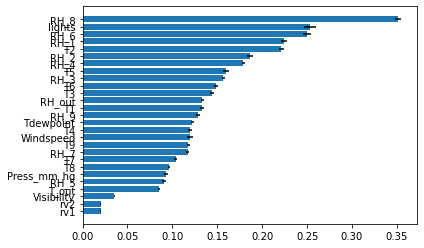

In [162]:
perm_importance_result_train = permutation_importance(rfr, Xtrain, Ytrain, n_repeats=10)
plot_feature_importances(perm_importance_result_train, Xtrain.columns)

From the feature importance output, we can find that the important variable in the random forest model is RH_8, Lights, RH_6, RH_1, RH_2 and RH_4. Because they takes a good portition in the importance feature chart.

### Decision Tree regressor

####  a) Create a Lasso regression, decision tree, Random forest, and GradientBoost models. Fit the model using the training dataset and find the model RMSE and R-Square. Explain each model's outcome, finding, and accuracy. (4x3=12 points) 

In [56]:
#import libraries
import numpy as np

class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        # for leaf node
        self.value = value

class decisiontreeregressor():
    
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
        #features
        self.features_used = []
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        best_split = {}
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["var_red"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # generate feature list
                self.features_used.append([self.features[best_split["feature_index"]],curr_depth])
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["var_red"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_var_red = -float("inf")
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # update the best split if needed
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction
    
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        val = np.mean(Y)
        return val
                
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(round(tree.value,4))

        else:
            print("|-",self.features[tree.feature_index], "<=", tree.threshold, ":Variance Red", round(tree.var_red,4))
            print("%sleft-->" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright-->" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.features = X.columns
        self.root = self.build_tree(dataset)
        
    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        ''' function to predict a single data point '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def get_features(self):
        return self.features_used 

In [57]:
dtModel = decisiontreeregressor(min_samples_split=3, max_depth=3)
dtModel.fit(Xtrain,Ytrain.reshape(-1,1))

In [175]:
Ypred_train = dtModel.predict(Xtrain.values)

In [98]:
print('Decision Tree - Mean Squared error:', round(mean_squared_error(Ytrain,Ypred_train),4))
print('Decision Tree - R-Squared:', round(r2_score(Ytrain,Ypred_train),4))

Decision Tree - Mean Squared error: 9078.794
Decision Tree - R-Squared: 0.1464


From the training dataset accuracy output for the decision tree model, we can find that the mean squared error is 9078.794 and the R - squared value is 0.1464. This means we have 14.64% accurancy on the testing dataset. This is a low rate. This means our model performance is not working very well on the training dataset because the accuracy is greatly less than 60%. Our model has a poor fit on training dataset.

####  b) Predict the models using the test dataset, and provide the performance metrics. Compare the four models' performance metrics, and explain at least four findings on each of the models. Do not repeat the code to fit the model. (4x3=12 points)

In [184]:
Ypred = dtModel.predict(Xtest.values)

In [185]:
print('Decision Tree - Mean Squared error:', round(mean_squared_error(Ytest,Ypred),4))
print('Decision Tree - R-Squared:', round(r2_score(Ytest,Ypred),4))
print('Decision Tree - Mean Absolute error:', round(mean_absolute_error(Ytest,Ypred),4))
print('Decision Tree - Explained variance score:',round(explained_variance_score(Ytest,Ypred),4))

Decision Tree - Mean Squared error: 9099.1746
Decision Tree - R-Squared: 0.0907
Decision Tree - Mean Absolute error: 54.0024
Decision Tree - Explained variance score: 0.0911


Finding:

From the testing dataset accuracy output for the decision tree model, we can find that:

• The mean squared error is 9099.1746, which is kind of large. This means our mean squared error regression loss is 9099.1746.

• R - squared value is 0.0907. This means we have 9.07% accurancy on the testing dataset. This is a low rate. This means our model performance is not working very well on the testing dataset because the accuracy is greating less than 60%. Compared to the training dataset which has 14.64% accuracy, even though the training dataset is low enough, our testing dataset accuracy is much lower than the model on the training dataset. Therefore, our model has a underfitting issue because the accuracy are very low for both of the training dataset and the testing dataset.

• The mean absolute error is 54.0024, which means mean absolute error regression loss of this model is 54.0024, kind of large.

• The explained variance regression score of this function is 0.0911, which is very small. Our model is not good.

####  c) Do you see any bias and variance issues? How do you interpret each model output? (4x3=12 points)

In this Decision Tree model, we can see that for the training dataset, the RMSE is 9078.794, which has not much difference compared with the RMSE of the testing dataset which is 9099.1746. And the R-squared for the predicting training dataset is 0.1464. It's also not much difference compared with the testing dataset R-squared which is 0.0907. However, both of the high RMSE and the low R-Squared data of training dataset and the testing dataset indicates that our model has a bad performance on predicting the dataset. 

Therefore, we have a <b>low variance </b> in our model. Variance indicates how much the estimate of the target function will alter if different training data were used. And it measures the inconsistency of different predictions using different training sets. Because that both of our training dataset predictions and the testing dataset predictions perform bad, and they have very less difference on performance compared with each other, we can say that they have low variance because the model didn't change too much when using the different datasets.

Bias means the amount that a model's prediction differs from the target value, compared to the training data. Because that our model RMSE is very high and the R-squared rate is very low, our model performs very bad. We could say we have a very <b>high bias</b>. This is because our model's prediction always very differ from the target value

To conclude, we have a low variance and high bias in the random forest model.

#### d) Write a function to find important features in each model? Why is it an important feature of the model? Explain with some statistical evidence. (6 points)

In [64]:
dfX.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Print decision tree

In [65]:
dtModel.print_tree()

|- lights <= 0.0 :Variance Red 405.5117
 left-->|- RH_out <= 70.3333333333333 :Variance Red 307.4177
  left-->|- T3 <= 23.5 :Variance Red 479.9704
    left-->|- RH_1 <= 46.7666666666667 :Variance Red 239.8035
        left-->98.5672
        right-->500.0
    right-->|- T1 <= 23.1527142857143 :Variance Red 1978.5137
        left-->226.129
        right-->120.1591
  right-->|- RH_8 <= 39.1528571428571 :Variance Red 151.4739
    left-->|- RH_3 <= 39.9 :Variance Red 734.4509
        left-->103.0057
        right-->286.0714
    right-->|- T2 <= 19.39 :Variance Red 118.5591
        left-->60.5075
        right-->82.2869
 right-->|- T9 <= 17.1 :Variance Red 504.8531
  left-->|- RH_2 <= 34.09 :Variance Red 2486.905
    left-->980.0
    right-->|- RH_5 <= 50.988888888888894 :Variance Red 1683.5191
        left-->129.2771
        right-->216.4478
  right-->|- RH_out <= 80.5 :Variance Red 528.6071
    left-->|- Windspeed <= 5.8333333333333295 :Variance Red 517.7859
        left-->137.5207
        

### List of features used in the decision tree

In [66]:
dtFeatures = pd.DataFrame(dtModel.get_features())
dtFeatures.columns = ['featurename','treelevel']
dtFeatures = dtFeatures.drop_duplicates()
dtFeatures.sort_values('treelevel')

,featurename,treelevel
13,lights,0
6,RH_out,1
12,T9,1
2,T3,2
5,RH_8,2
8,RH_2,2
11,RH_out,2
0,RH_1,3
1,T1,3
3,RH_3,3


From the printing decision tree and the list of features used in the decision tree, we found out that the RH_out variable appears twice and it's on treelevel 1 and 2, which are very close to the root node. Therefore, RH_out is the important feature in this model.

ALso,lights variable is the root node. So it's an important variable as well.

T9 variable is in the tree level 1 which is also near to the root variable so it's an important feature as well.

<b>Therefore, in the decision tree model, the important features are 'RH_out', 'lights' and 'T9'.</b>

### Lasso Regression

####  a) Create a Lasso regression, decision tree, Random forest, and GradientBoost models. Fit the model using the training dataset and find the model RMSE and R-Square. Explain each model's outcome, finding, and accuracy. (4x3=12 points) 

In [73]:
"""Module containing classes for supervised linear regression models."""
import numpy as np
from scipy.linalg import lstsq

from statmodels.regression.utils.regularization import l1_regularization, l2_regularization,l1_l2_regularization
from statmodels.regression.utils.metrics import mean_squared_error, r2_score

class Regression():
    """
    Class representing our base regression model.  
    
    Models relationship between a dependant scaler variable y and independent
    variables X by optimizing a cost function with batch gradient descent.

    Parameters
    ----------
    n_iter : float, default=1000
        Maximum number of iterations to be used by batch gradient descent.
    lr : float, default=1e-1
        Learning rate determining the size of steps in batch gradient descent.

    Attributes 
    ----------
    coef_ : array of shape (n_features,)
        Estimated coefficients for the regression problem.
    """
    def __init__(self, n_iter=1000, lr=1e-1):
        self.n_iter = n_iter 
        self.lr = lr 

    def fit(self, X, y):
        """
        Fit linear model with batch gradient descent.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data. Independent variables.
        y : array-like of shape (n_samples, 1)
            Target values. Dependent variable.

        Returns
        -------
        self : returns an instance of self.
        """
        # Insert X_0 = 1 for the bias term.
        X = np.insert(X, 0, 1, axis=1)

        # Store number of samples and features in variables.
        n_samples, n_features = np.shape(X)
        self.training_errors = []

        # Randomly intialize weights using glorot uniform intializer.
        limit = np.sqrt(2 / n_features)
        self.coef_ = np.random.uniform(-limit, limit, (n_features,))

        # Batch gradient descent for number iterations = n_iter.
        for _ in range(self.n_iter):
            y_preds = X.dot(self.coef_)

            # Penalty term if regularized (don't include bias term).
            regularization = self.regularization(self.coef_[1:])

            # Calculate mse + penalty term if regularized.
            cost_function = mean_squared_error(y, y_preds) + regularization
            self.training_errors.append(cost_function) 

            # Regularization term of gradients (don't include bias term).
            gradient_reg = self.regularization.grad(self.coef_[1:])

            # Gradients of loss function.
            gradients = (2/n_samples) * X.T.dot(y_preds - y)
            gradients = gradients + gradient_reg

            # Update the weights.
            self.coef_ -= self.lr * gradients 

        return self 

    def predict(self, X):
        """
        Estimate target values using the linear model.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Instances.

        Returns
        -------
        C : array of shape (n_samples,)
            Estimated targets per instance.
        """
        # Insert X_0 = 1 for the bias term.
        X = np.insert(X, 0, 1, axis=1)

        return X.dot(self.coef_)

    def score(self, X, y):
        """
        Calculate the coefficient of determination, R^2 of the predictions.

            R^2 = 1 - SS_res / SS_tot

        where SS_res is the residual sum of squares and SS_tot is the total
        sum of squares.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Test samples for model to be scores against.
        y : array-like of shape (n_samples,).
            True values for test samples.

        Returns
        -------
        score : float
            R^2 calculated on test samples.
        """
        y_preds = self.predict(X)

        score = r2_score(y, y_preds)

        return score


class LinearRegression(Regression):
    """
    Class representing a linear regression model.

    Models relationship between target variable and attributes by computing 
    line that minimizes mean squared error.

    Parameters
    ----------
    n_iter : float, default=1000
        Maximum number of iterations to be used by batch gradient descent.
    lr : float, default=1e-1
        Learning rate determining the size of steps in batch gradient descent.     
    solver : {'bgd', 'lstsq'}, default="bgd"
        Optimization method used to minimize mean squared error in training.

        'bgd' : 
            Batch gradient descent.

        'lstsq' : 
            Ordinary lease squares method using scipy.linalg.lstsq.

    Attributes 
    ----------
    coef_ : array of shape (n_features,)
        Estimated coefficients for the regression problem.

    Notes
    -----
    This class is capable of being trained using ordinary least squares method
    or batch gradient descent.  See solver parameter above.
    """
    def __init__(self, n_iter=1000, lr=1e-1, solver='bgd'):
        self.solver = solver 

        # No regularization.
        self.regularization = lambda x: 0
        self.regularization.grad = lambda x: 0
        super(LinearRegression, self).__init__(n_iter=n_iter, lr=lr)

    def fit(self, X, y):
        """
        Fit linear regression model.

        If solver='bgd', model is trained using batch gradient descent. 
        If solver='lstsq' model is trained using ordinary least squares.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data. Independent variables.
        y : array-like of shape (n_samples,)
            Target values. Dependent variable.

        Returns
        -------
        self : returns an instance of self.
        """
        # If solver is 'lstsq' use ordinary least squares optimization method.
        if self.solver == 'lstsq':

            # Insert X_0 = 1 for the bias term.
            X = np.insert(X, 0, 1, axis=1)
            
            # Scipy implementation of least squares.
            self.coef_, residues, rank, singular = lstsq(X, y)

            return self

        elif self.solver == 'bgd': 
            super(LinearRegression, self).fit(X, y)


class RidgeRegression(Regression):
    """
    Class representing a linear regression model with l2 regularization.

    Minimizes the cost fuction:

        J(w) = MSE(w) + alpha * 1/2 * ||w||^2

    where w is the vector of feature weights and alpha is the hyperparameter
    controlling how much regularization is done to the model.

    Parameters
    ----------
    n_iter : float, default=1000
        Maximum number of iterations to be used by batch gradient descent.
    lr : float, default=1e-1
        Learning rate determining the size of steps in batch gradient descent.
    alpha : float, default=1.0
        Factor determining the amount of regularization to be performed on
        the model.

    Attributes 
    ----------
    coef_ : array of shape (n_features,)
        Estimated coefficients for the regression problem.

    Notes
    -----
    This class is capable of being trained using batch gradient descent at
    current version.
    """
    def __init__(self, n_iter=1000, lr=1e-1, alpha=1.0, solver='bgd'):
        self.alpha = alpha
        self.regularization = l2_regularization(alpha=self.alpha)
        super(RidgeRegression, self).__init__(n_iter=n_iter, lr=lr)


class LassoRegression(Regression):
    """
    Class representing a linear regression model with l1 regularization.

    Minimizes the cost fuction:

        J(w) = MSE(w) + alpha * ||w||

    where w is the vector of feature weights and alpha is the hyperparameter
    controlling how much regularization is done to the model.

    Parameters
    ----------
    n_iter : float, default=1000
        Maximum number of iterations to be used by batch gradient descent.
    lr : float, default=1e-2
        Learning rate determining the size of steps in batch gradient descent.
    alpha : float, default=1.0
        Factor determining the amount of regularization to be performed on
        the model.

    Attributes
    ----------
    coef_ : array of shape (n_features,)
        Estimated coefficients for the regression problem.

    Notes
    -----
    This class is capable of being trained using batch gradient descent at
    current version.
    """
    def __init__(self, n_iter=1000, lr=1e-2, alpha=1.0):
        self.alpha = alpha
        self.regularization = l1_regularization(alpha=self.alpha)
        super(LassoRegression, self).__init__(n_iter=n_iter, lr=lr)


class ElasticNetRegression(Regression):
    """
    Class representing a linear regression model with a mix of l1 and l2 
    regularization.

    Minimizes the cost function:

        J(w) = MSE(w) + r * alpha * ||w|| + (1 - r) * alpha * 1/2 * ||w||^2

    where w is the vector of feature weights, r is the mix ratio, and alpha
    is the hyperparameter controlling how much regularization is done.

    Parameters
    ----------
    n_iter : float, default=1000
        Maximum number of iterations to be used by batch gradient descent.
    lr : float, default=1e-2
        Learning rate determining the size of steps in batch gradient descent.
    alpha : float, default=1.0
        Factor determining the amount of regularization to be performed on
        the model.
    r : float, default=0.5
        Mix ratio determining the amount of l1 vs l2 regularization to add.  
        A value of 0 is equivalent to l2 regularization and a value of 1 is
        equivalent to l1 regularization.

    Attributes
    ----------
    coef_ : array of shape (n_features,)
        Estimated coefficients for the regression problem.

    Notes
    -----
    This class is capable of being trained using batch gradient descent at
    current version.
    """
    def __init__(self, n_iter=1000, lr=1e-2, alpha=1.0, r=0.5):
        self.alpha = alpha
        self.r = r 
        self.regularization = l1_l2_regularization(alpha=self.alpha, r=self.r)
        super(ElasticNetRegression, self).__init__(n_iter=n_iter, lr=lr)

In [186]:
sc = StandardScaler()
dfX_tranformed = pd.DataFrame(sc.fit_transform(dfX))

In [187]:
# Split the dataset into training and testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(dfX_tranformed, Y, test_size = 0.2,random_state=42)

In [118]:
# Fit the model
lassoModel = LassoRegression(alpha=0.1)
lassoModel.fit(Xtrain.values, Ytrain) 

In [119]:
# Predict the training dataset
Ypred_train = lassoModel.predict(Xtrain.values)

In [120]:
# Find the performance
print('Lasso Regression - Mean Squared error:', round(mean_squared_error(Ytrain,Ypred_train),4))
print('Lasso Regression - R-Squared:', round(r2_score(Ytrain,Ypred_train),4))

Lasso Regression - Mean Squared error: 9004.7142
Lasso Regression - R-Squared: 0.1534


From the training dataset accuracy output for the random forest model, we can find that the mean squared error is 9004.7142 and the R - squared value is 0.1534. This means we have 15.34% accurancy on the testing dataset. This is a low rate. This means our model performance is not working very well on the training dataset because the accuracy is less than 60%. Our model has a poor fit on the training dataset.

#### b) Predict the models using the test dataset, and provide the performance metrics. Compare the four models' performance metrics, and explain at least four findings on each of the models. Do not repeat the code to fit the model. (4x3=12 points)



In [188]:
# Predict the testing dataset
Ypred = lassoModel.predict(Xtest.values)

In [189]:
# Find the performance
print('Lasso Regression - Mean Squared error:', round(mean_squared_error(Ytest,Ypred),4))
print('Lasso Regression - R-Squared:', round(r2_score(Ytest,Ypred),4))
print('Lasso Regression - Mean Absolute error:', round(mean_absolute_error(Ytest,Ypred),4))
print('Lasso Regression - Explained variance score:',round(explained_variance_score(Ytest,Ypred),4))

Lasso Regression - Mean Squared error: 8393.4284
Lasso Regression - R-Squared: 0.1613
Lasso Regression - Mean Absolute error: 52.7347
Lasso Regression - Explained variance score: 0.1618


Finding:

From the testing dataset accuracy output for the decision tree model, we can find that:

• The mean squared error is 8393.4284, which is kind of large. This means our mean squared error regression loss is 8393.4284.

• R - squared value is 0.1613. This means we have 9.07% accurancy on the testing dataset. This is a low rate. This means we have 16.13% accurancy on the testing dataset. This means our model performance is not working very well on the testing dataset because the accuracy is greating less than 60%. Compared to the training dataset which has 15.43% accuracy, even though the training dataset is low enough, our testing dataset accuracy is much lower than the model on the training dataset. Therefore, our model has a underfitting issue because the accuracy are very low for both of the training dataset and the testing dataset.

• The mean absolute error is 52.7347, which means mean absolute error regression loss of this model is 52.7347, kind of large.

• The explained variance regression score of this function is 0.1618, which is very small. Our model is not good.

####  c) Do you see any bias and variance issues? How do you interpret each model output? (4x3=12 points)

In this Lasso regression model, we can see that for the training dataset, the RMSE is 9004.7142, which has not much difference compared with the RMSE of the testing dataset which is 8393.4284. And the R-squared for the predicting training dataset is 0.1534. It's also not much difference compared with the testing dataset R-squared which is 0.1613. However, both of the high RMSE and the low R-Squared data of training dataset and the testing dataset indicates that our model has a bad performance on predicting the dataset. 

Therefore, we have a <b>low variance </b> in our model. Variance indicates how much the estimate of the target function will alter if different training data were used. And it measures the inconsistency of different predictions using different training sets. Because that both of our training dataset predictions and the testing dataset predictions perform bad, and they have very less difference on performance compared with each other, we can say that they have low variance because the model didn't change too much when using the different datasets.

Bias means the amount that a model's prediction differs from the target value, compared to the training data. Because that our model RMSE is very high and the R-squared rate is very low, our model performs very bad. We could say we have a very <b>high bias</b>. This is because our model's prediction always very differ from the target value

To conclude, we have a low variance and high bias in the Lasso regression model.

#### d) Write a function to find important features in each model? Why is it an important feature of the model? Explain with some statistical evidence. (6 points)

In [124]:
print("Lasso model cofficients :",lassoModel.coef_)

Lasso model cofficients : [ 9.81546703e+01  1.66561642e+01 -1.01294803e+01  3.89444173e+01
 -7.52632657e-01 -2.10674431e+01  4.14052566e+01  1.29172400e+01
 -1.23983388e+01 -2.89359358e+00 -9.10362734e+00  1.91108695e+00
  1.40264946e+01  3.43906247e+00 -4.89086095e-01 -1.15448849e+01
  8.94776234e+00 -2.09537949e+01 -1.50820788e+01 -5.83189436e+00
 -5.60927680e+00  2.49326839e-01 -1.22827829e+00  4.43571512e+00
  1.71676070e+00 -3.49487357e+00  6.62542260e-04  5.38482660e-04]


### Feature importance for Lasso regression

In [79]:
lassoImportantfeatures = pd.DataFrame(data={'feature': dfX.columns})
lassoImportantfeatures["importance"] = pd.DataFrame(lassoModel.coef_[1:])
lassoImportantfeatures = lassoImportantfeatures.sort_values(by='importance', ascending=False)

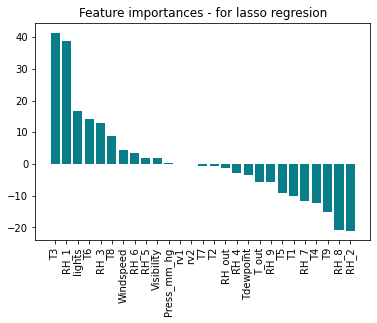

In [80]:
plt.bar(x=lassoImportantfeatures['feature'], height=lassoImportantfeatures['importance'], color='#087E8B')
plt.title('Feature importances - for lasso regresion')
plt.xticks(rotation='vertical')
plt.show()

From the feature importance output, we can find that the 'T3', 'RH_1', 'lights', 'T6', 'RH_3', 'T8' variables have high feature importance and therefore, they are the importance features of the Lasso regression Model.

<b>The importance features of Lasso Regression are: 'T3', 'RH_1', 'lights', 'T6', 'RH_3', 'T8'</b>

### Gradient Boosting model

####  a) Create a Lasso regression, decision tree, Random forest, and GradientBoost models. Fit the model using the training dataset and find the model RMSE and R-Square. Explain each model's outcome, finding, and accuracy. (4x3=12 points) 



In [151]:
#imports
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd
from typing import Dict, Any, List
from sklearn.base import clone

## boosting regressor ##
class GradientBoostTreeRegressor(object):
    #initializer
    def __init__(self,  n_elements : int = 100, learning_rate : float = 0.01) -> None:
        self.weak_learner  = DecisionTreeRegressor(max_depth=5)
        self.n_elements    = n_elements
        self.learning_rate = learning_rate
        self.f             = []
        self.residuals     = []
        
    #destructor
    def __del__(self) -> None:
        del self.weak_learner
        del self.n_elements
        del self.learning_rate
        del self.f
        del self.residuals
    
    #public function to return model parameters
    def get_params(self, deep : bool = False) -> Dict:
        return {'weak_learner':self.weak_learner,'n_elements':self.n_elements,'learning_rate':self.learning_rate}
    
    #public function to train the ensemble
    def fit(self, X_train : np.array, y_train : np.array) -> None:
        #initialize residuals
        r = np.copy(y_train).astype(float)
        #loop through the specified number of iterations in the ensemble
        for _ in range(self.n_elements):
            #make a copy of the weak learner
            model = clone(self.weak_learner)
            #fit the weak learner on the current dataset
            model.fit(X_train,r)
            #update the residuals
            r -= self.learning_rate*model.predict(X_train)
            #append resulting model
            self.f.append(model)
            #append current mean residual
            self.residuals.append(np.mean(r))    
            
    #public function to return residuals
    def get_residuals(self) -> List:
        return(self.residuals)
    
    #public function to generate predictions
    def predict(self, X_test : np.array) -> np.array:
        #initialize output
        y_pred = np.zeros((X_test.shape[0]))
        #traverse ensemble to generate predictions
        for model in self.f:
            y_pred += self.learning_rate*model.predict(X_test)
        #return predictions
        return(y_pred)

In [152]:
gradBoostModel = GradientBoostTreeRegressor(n_elements=1000, learning_rate=0.1)

#fit the model
gradBoostModel.fit(Xtrain.values,Ytrain)

In [154]:
Ypred_train = gradBoostModel.predict(Xtrain.values)

print('Gradient Boost Regression - Mean Squared error:', round(mean_squared_error(Ytrain,Ypred_train),4))
print('Gradient Boost Regression - R-Squared:', round(r2_score(Ytrain,Ypred_train),4))
print('Random Forest - precision_score',round(precision_score(Ytrain,Ypred),4))
print('Random Forest - recall_score',round(recall_score(Ytrain,Ypred),4))

Gradient Boost Regression - Mean Squared error: 525.8333
Gradient Boost Regression - R-Squared: 0.9506


From the training dataset accuracy output for the random forest model, we can find that the mean squared error is 525.8333 and the R - squared value is 0.9506. This means our model has 95.06% accuracy on the training dataset.This is a very high probability rate. This means our model performance is really perfect on the training dataset.

####  b) Predict the models using the test dataset, and provide the performance metrics. Compare the four models' performance metrics, and explain at least four findings on each of the models. Do not repeat the code to fit the model. (4x3=12 points)



In [190]:
Ypred = gradBoostModel.predict(Xtest.values)

print('Gradient Boost Regression - Mean Squared error:', round(mean_squared_error(Ytest,Ypred),4))
print('Gradient Boost Regression - R-Squared:', round(r2_score(Ytest,Ypred),4))
print('Gradient Boost Regression - Mean Absolute error:', round(mean_absolute_error(Ytest,Ypred),4))
print('Gradient Boost Regression - Explained variance score:',round(explained_variance_score(Ytest,Ypred),4))

Gradient Boost Regression - Mean Squared error: 4686.9976
Gradient Boost Regression - R-Squared: 0.5316
Gradient Boost Regression - Mean Absolute error: 34.5779
Gradient Boost Regression - Explained variance score: 0.5319


Finding:

From the testing dataset accuracy output for the Gradient Boost Regression model, we can find that:

• The mean squared error is 4686.9976, which is kind of large. This means our mean squared error regression loss is 4686.9976.

• R - squared value is 0.5316. This means we have 53.16% accurancy on the testing dataset. This is a low rate. This means our model performance is not working very well on the testing dataset because the accuracy is just a little bit above 50%. Compared to the training dataset which has 95.06% accuracy, our testing dataset accuracy is extremely low. Therefore, our model has a significant overfitting because the training dataset accuracy is greatly higher than the testing dataset accuracy.

• The mean absolute error is 34.5779, which means mean absolute error regression loss of this model is 34.5779, kind of large.

• The explained variance regression score of this function is 0.5319, which is small. Our model is not good.

#### c) Do you see any bias and variance issues? How do you interpret each model output? (4x3=12 points)



In this Gradient Boost model, we can see that for the training dataset, the MSE is 525.8333, which is significanly less than the MSE of the testing dataset which is 4686.9976. And the R-squared for the predicting training dataset is 0.9506. It's also significantly greater than the testing dataset R-squared which is 0.5316. This means the performance of the random forest model works well on the training dataset and it performs bad in the testing dataset. Therefore, we have an overfitting issue and thus we have a <b>high variance </b> in our model. Variance indicates how much the estimate of the target function will alter if different training data were used. And it measures the inconsistency of different predictions using different training sets. Because that our training dataset works well, but our testing dataset works bad, we have a greatly inconsistency of different predictions using different sets. Therefore, we have a high variance in this model.

Bias means the amount that a model's prediction differs from the target value, compared to the training data. Because that our model overall accuracy (95.06% in training dataset) works perfect, we could say we have a <b>low bias</b>.

Therefore, we have a high variance and low bias in the Gradient Boost model.

#### d) Write a function to find important features in each model? Why is it an important feature of the model? Explain with some statistical evidence. (6 points)



In [191]:
def get_score_after_permutation(model, X, y, curr_feat):
    """ return the score of model when curr_feat is permuted """

    X_permuted = X.copy()
    col_idx = list(X.columns).index(curr_feat)
    # permute one column
    X_permuted.iloc[:, col_idx] = np.random.permutation(
        X_permuted[curr_feat].values)
    y_pred = model.predict(X_permuted.values)

    permuted_score = r2_score(y, y_pred)
    return permuted_score


def get_feature_importance(model, X, y, curr_feat):
    """ compare the score when curr_feat is permuted """
    y_pred = model.predict(X.values)

    baseline_score_train = r2_score(y, y_pred)
    permuted_score_train = get_score_after_permutation(model, X, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance
    
def permutation_importance(model, X, y, n_repeats=10):
    """Calculate importance score for each feature."""

    importances = []
    for curr_feat in X.columns:
        list_feature_importance = []
        for n_round in range(n_repeats):
            list_feature_importance.append(
                get_feature_importance(model, X, y, curr_feat))

        importances.append(list_feature_importance)

    return {'importances_mean': np.mean(importances, axis=1),
            'importances_std': np.std(importances, axis=1),
            'importances': importances}

def plot_feature_importances(perm_importance_result, feat_name):
    """ bar plot the feature importance """

    fig, ax = plt.subplots()

    indices = perm_importance_result['importances_mean'].argsort()
    plt.barh(range(len(indices)),
             perm_importance_result['importances_mean'][indices],
             xerr=perm_importance_result['importances_std'][indices])

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])

In [198]:
Xtrain.columns = dfX.columns
Xtrain

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
2133,-0.47908,-1.118645,1.316914,-0.520411,1.147399,-0.935970,1.550932,-0.859265,1.767501,-1.128170,...,-1.151142,1.721736,0.543199,0.861898,0.385860,1.411679,-1.257445,0.998749,0.983207,0.983207
19730,-0.47908,2.415962,1.583299,2.530318,0.394449,2.458745,0.590209,1.882026,1.511812,1.955947,...,1.843571,1.261649,2.881489,-0.043599,-1.616282,-0.288198,-1.243314,2.282163,1.249203,1.249203
3288,-0.47908,0.506486,1.048015,0.543620,0.533104,-0.151679,1.632358,0.560332,0.331650,-0.266786,...,-0.439691,0.958136,-0.152647,0.632145,-1.057025,1.615664,0.141522,-0.848891,1.177312,1.177312
7730,-0.47908,-1.180910,-0.552810,-1.432438,0.126032,-0.831287,-0.638860,-1.206822,-0.466898,-0.705911,...,-0.543927,-0.199708,-0.998945,-1.890633,0.978673,-1.240129,0.876332,-0.602539,-0.853473,-0.853473
8852,-0.47908,-0.676559,-1.248930,-1.478040,-0.154906,-0.985819,-0.689047,-0.663458,-1.042775,-0.754702,...,-0.277546,-0.352268,-1.556875,1.722345,0.844451,-0.968148,-0.367193,-1.357488,-0.971982,-0.971982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-0.47908,0.045721,0.160902,-0.433769,0.655963,0.365088,-0.074512,0.315574,0.175780,0.275344,...,0.432251,-0.239053,0.405283,-0.683303,-0.139842,1.071703,0.141522,0.494125,1.415893,1.415893
11964,-0.47908,0.437994,0.864561,0.756426,0.404512,0.215541,0.610694,0.212776,1.173197,0.058492,...,0.399160,0.659441,1.859663,-0.813947,-0.922803,-0.832158,0.141522,1.702044,0.686157,0.686157
5390,-0.47908,-0.869583,-1.145894,-0.976425,-0.695485,-1.080532,-0.507759,-1.299830,-0.860798,-0.592063,...,-0.792107,-0.502418,-1.594488,-0.084144,0.486526,-0.152208,2.063334,-1.595893,-0.408152,-0.408152
860,-0.47908,0.064400,-1.181077,0.042309,-1.303390,-0.532193,-0.719774,0.119768,-0.774800,-0.836022,...,-0.489327,-0.020652,-1.005214,1.285364,-1.034654,-1.104138,0.141522,-1.866086,-1.651283,-1.651283


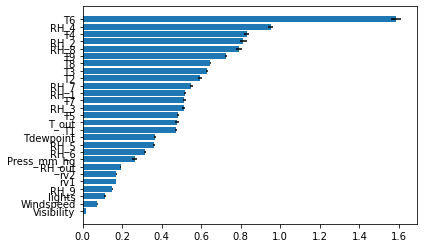

In [199]:
perm_importance_result_train = permutation_importance(gradBoostModel, Xtrain, Ytrain, n_repeats=5)
plot_feature_importances(perm_importance_result_train, Xtrain.columns)

From the Grdient Boost model output, we can see that the importance features of this model are 'T6', 'RH_6','T4','RH_2' and 'RH_8'. This is because they takes a great porpotion in the importance feature chart. 